In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [38]:
# Tạo dữ liệu mẫu

np.random.seed(0)
centers = [[8, 6], [3, 3], [4, 6], [6, 4]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(centers[0], cov, N)
X1 = np.random.multivariate_normal(centers[1], cov, N)
X2 = np.random.multivariate_normal(centers[2], cov, N)
X3 = np.random.multivariate_normal(centers[3], cov, N)
X = np.concatenate((X0, X1, X2, X3), axis=0)

In [44]:
# Hàm vẽ dữ liệu và ranh giới cụm
def display(X, label, centers):
    K = np.amax(label) + 1
    colors = ['b', 'r', 'g', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
    markers = ['^', 'o', 's', '*', 'D', 'v', '<', '>', 'p', 'h']

    # Vẽ các điểm dữ liệu
    for i in range(K):
        Xi = X[label == i, :]
        plt.scatter(Xi[:, 0], Xi[:, 1], c=colors[i], marker=markers[i], s=10, alpha=0.7, label=f'Cluster {i}')

    # Vẽ tâm cụm
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centroids')

    # Vẽ ranh giới giữa các cụm
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='Pastel2')

    plt.axis('equal')
    plt.gcf().set_facecolor('#000000')  # Đổi màu nền
    plt.legend()
    plt.show()

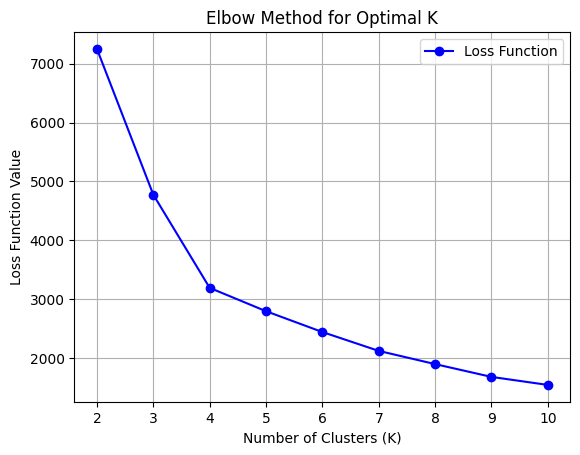

In [40]:
# 🔥 Tìm số cụm K tối ưu bằng Elbow Method
losses = []
silhouette_scores = []
K_range = range(2, 11)  # Xét các giá trị từ 2 đến 10 cụm
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    losses.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# 🔥 Vẽ đồ thị Elbow Method
plt.figure()
plt.plot(K_range, losses, marker='o', linestyle='-', color='b', label='Loss Function')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Loss Function Value')
plt.grid()
plt.legend()
plt.show()

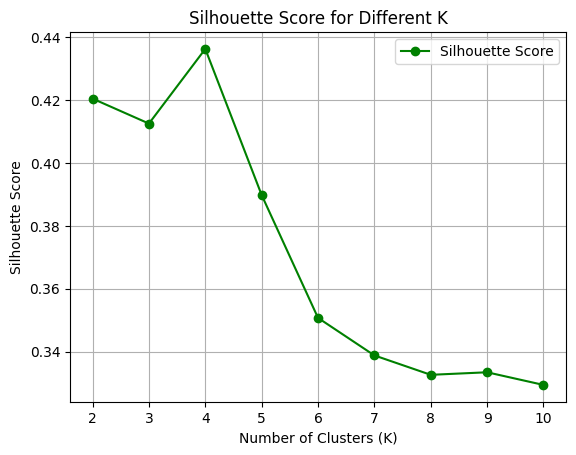

In [42]:
# 🔥 Vẽ đồ thị Silhouette Score
plt.figure()
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g', label='Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

In [45]:

# 🔥 Chọn K tối ưu dựa trên Elbow Method
optimal_K = int(input("Chọn số cluster đi em: "))  # Bạn có thể nhìn vào đồ thị Elbow và chỉnh số này nếu cần
print("Optimal number of clusters (K) chosen:", optimal_K)

# 🔥 K-means cluster với K tối ưu
kmeans = KMeans(n_clusters=optimal_K, random_state=0).fit(X)
label = kmeans.predict(X)

Optimal number of clusters (K) chosen: 5


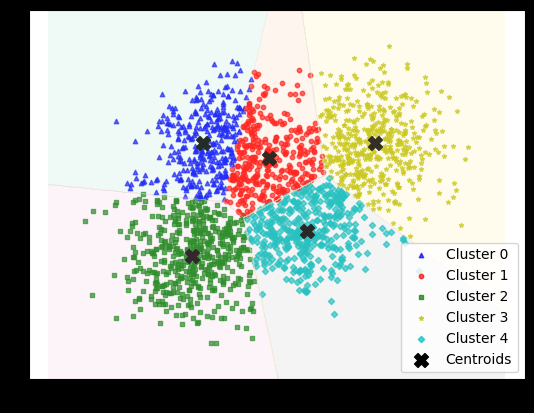

The centers of each cluster:
 [[3.29187753 6.05102342]
 [5.13154967 5.62773696]
 [2.98238209 2.90337139]
 [8.09172701 6.0437503 ]
 [6.19822096 3.59054949]]
Loss function value:
 2799.2389145611314
Silhouette score:
 0.389786648678529


In [46]:
# Hiển thị dữ liệu sau khi phân cụm
display(X, label, kmeans.cluster_centers_)

# In kết quả
print("The centers of each cluster:\n", kmeans.cluster_centers_)
print("Loss function value:\n", kmeans.inertia_)
print("Silhouette score:\n", silhouette_score(X, kmeans.labels_))
